# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # braking into list city_weather_1 = city_weather["weather"][0]["description"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hanko
Processing Record 2 of Set 1 | hamilton
Processing Record 3 of Set 1 | anadyr
Processing Record 4 of Set 1 | alotau
City not found. Skipping...
Processing Record 5 of Set 1 | namibe
Processing Record 6 of Set 1 | auki
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | invercargill
Processing Record 10 of Set 1 | northam
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | bykhaw
Processing Record 13 of Set 1 | sinabang
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | stanley
Processing Record 16 of Set 1 | lerwick
Processing Record 17 of Set 1 | minot air force base
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | fallbrook
Processing Record 20 of Set 1 | jayapura
Processing Record 21 of Set 1 | lihue
Pr

Processing Record 42 of Set 4 | afaahiti
Processing Record 43 of Set 4 | san luis de la loma
Processing Record 44 of Set 4 | santa cruz
Processing Record 45 of Set 4 | stassfurt
Processing Record 46 of Set 4 | parnarama
Processing Record 47 of Set 4 | boiling spring lakes
Processing Record 48 of Set 4 | mejit
Processing Record 49 of Set 4 | kabo
Processing Record 0 of Set 5 | broome
Processing Record 1 of Set 5 | bismarck
Processing Record 2 of Set 5 | kortessem
Processing Record 3 of Set 5 | atafu village
Processing Record 4 of Set 5 | turgen
Processing Record 5 of Set 5 | kailua-kona
Processing Record 6 of Set 5 | moyynkum
Processing Record 7 of Set 5 | la cruz
Processing Record 8 of Set 5 | bangassou
Processing Record 9 of Set 5 | julio de castilhos
Processing Record 10 of Set 5 | dungarpur
Processing Record 11 of Set 5 | mahibadhoo
Processing Record 12 of Set 5 | kirakira
Processing Record 13 of Set 5 | abbeville
Processing Record 14 of Set 5 | oum hadjer
Processing Record 15 of Se

Processing Record 37 of Set 8 | kuraymah
Processing Record 38 of Set 8 | verkhniye sergi
Processing Record 39 of Set 8 | chonchi
Processing Record 40 of Set 8 | bireun
Processing Record 41 of Set 8 | galliano
Processing Record 42 of Set 8 | quemado de guines
Processing Record 43 of Set 8 | ploneour-lanvern
Processing Record 44 of Set 8 | marion
Processing Record 45 of Set 8 | bharuch
Processing Record 46 of Set 8 | singaraja
Processing Record 47 of Set 8 | swift current
Processing Record 48 of Set 8 | souillac
Processing Record 49 of Set 8 | bam
Processing Record 0 of Set 9 | debre werk'
Processing Record 1 of Set 9 | castelo do piaui
Processing Record 2 of Set 9 | la libertad
Processing Record 3 of Set 9 | caconda
Processing Record 4 of Set 9 | shakiso
Processing Record 5 of Set 9 | shilka
Processing Record 6 of Set 9 | dunedin
Processing Record 7 of Set 9 | rustaq
Processing Record 8 of Set 9 | khandyga
Processing Record 9 of Set 9 | coquimbo
Processing Record 10 of Set 9 | berezovyy

Processing Record 27 of Set 12 | tejen
Processing Record 28 of Set 12 | mermoz boabab
Processing Record 29 of Set 12 | edgewater
Processing Record 30 of Set 12 | mar del plata
Processing Record 31 of Set 12 | yamada
Processing Record 32 of Set 12 | meethari marwar
City not found. Skipping...
Processing Record 33 of Set 12 | mirai
Processing Record 34 of Set 12 | longavi
Processing Record 35 of Set 12 | berdigestyakh
Processing Record 36 of Set 12 | port saint john's
Processing Record 37 of Set 12 | yinchuan
Processing Record 38 of Set 12 | pangai
Processing Record 39 of Set 12 | maliana
City not found. Skipping...
Processing Record 40 of Set 12 | suntar
Processing Record 41 of Set 12 | axim
Processing Record 42 of Set 12 | acarau
Processing Record 43 of Set 12 | realeza
Processing Record 44 of Set 12 | harper
Processing Record 45 of Set 12 | al kharijah
Processing Record 46 of Set 12 | augusta
Processing Record 47 of Set 12 | coahuayana de hidalgo
Processing Record 48 of Set 12 | harst

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hanko,59.8333,22.9500,4.99,91,100,16.09,FI,1700699620
1,hamilton,39.1834,-84.5333,6.54,79,0,1.79,US,1700699620
2,anadyr,64.7500,177.4833,1.28,100,75,4.00,RU,1700699404
3,namibe,-15.1961,12.1522,22.05,76,64,3.92,AO,1700699620
4,auki,-8.7676,160.7034,30.05,65,100,1.90,SB,1700699621


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hanko,59.8333,22.9500,4.99,91,100,16.09,FI,1700699620
1,hamilton,39.1834,-84.5333,6.54,79,0,1.79,US,1700699620
2,anadyr,64.7500,177.4833,1.28,100,75,4.00,RU,1700699404
3,namibe,-15.1961,12.1522,22.05,76,64,3.92,AO,1700699620
4,auki,-8.7676,160.7034,30.05,65,100,1.90,SB,1700699621


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

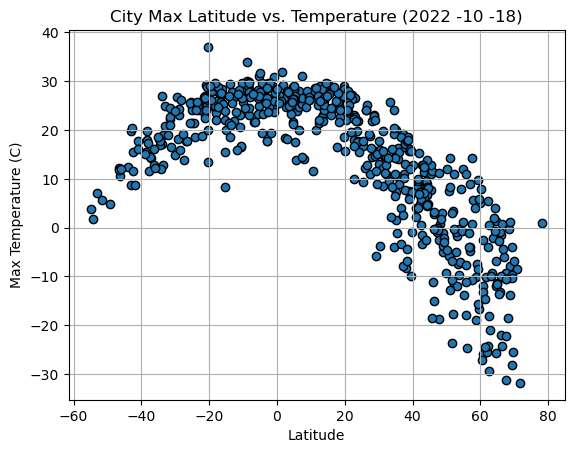

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022 -10 -18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

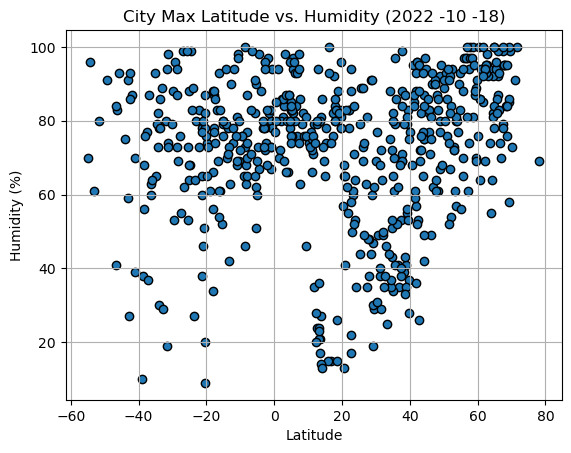

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (2022 -10 -18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

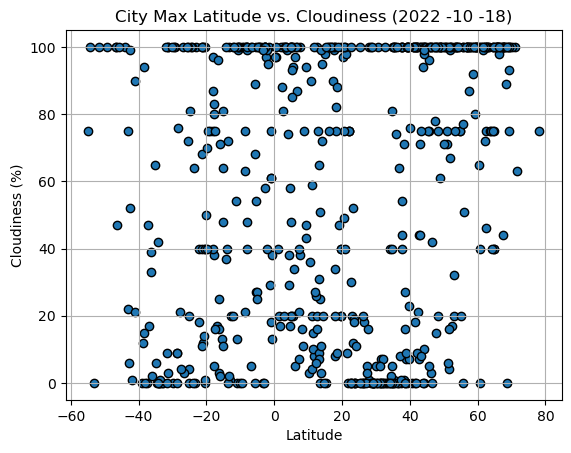

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness (2022 -10 -18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

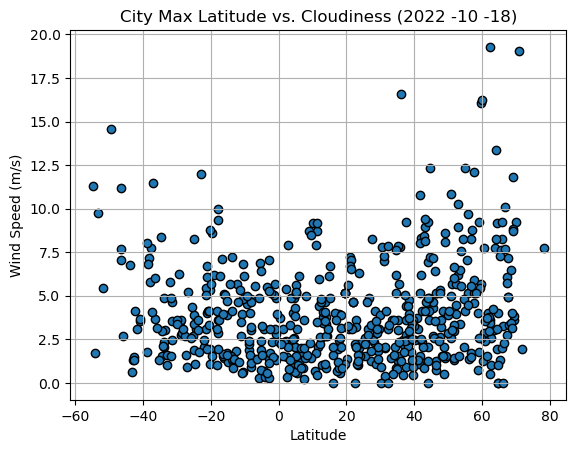

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness (2022 -10 -18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [81]:
# Define a function to create Linear Regression plots
from scipy import stats
def lin_regress(x, y):
    correlation = stats.pearsonr(x, y)
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return regress_values, line_eq, correlation
print(lin_regress)

<function lin_regress at 0x0000016EB7198550>


In [51]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hanko,59.8333,22.9500,4.99,91,100,16.09,FI,1700699620
1,hamilton,39.1834,-84.5333,6.54,79,0,1.79,US,1700699620
2,anadyr,64.7500,177.4833,1.28,100,75,4.00,RU,1700699404
7,northam,51.0333,-4.2167,14.25,92,71,5.66,GB,1700699621
9,bykhaw,53.5193,30.2469,-7.51,80,100,3.38,BY,1700699621


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,namibe,-15.1961,12.1522,22.05,76,64,3.92,AO,1700699620
4,auki,-8.7676,160.7034,30.05,65,100,1.90,SB,1700699621
5,edinburgh of the seven seas,-37.0676,-12.3116,14.19,87,17,11.49,SH,1700699621
6,invercargill,-46.4000,168.3500,10.57,83,47,11.18,NZ,1700699621
8,margaret river,-33.9500,115.0667,27.05,30,0,4.89,AU,1700699621


###  Temperature vs. Latitude Linear Regression Plot

The R value is: -0.8596133584058809


Text(0, 0.5, 'Max Temp')

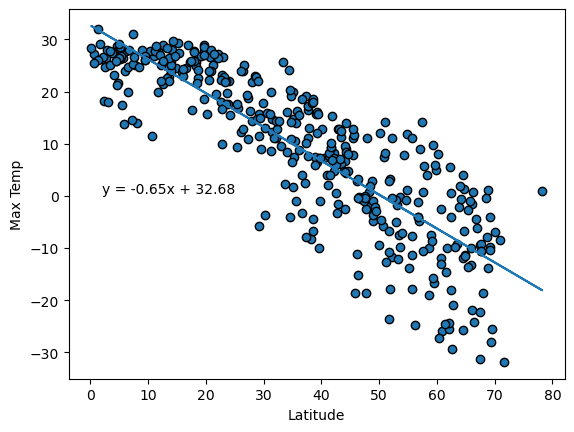

In [85]:
# Linear regression on Northern Hemisphere

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o", edgecolors="black")
lin_r, lin_r_eq, r_value = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"], lin_r)
plt.annotate(lin_r_eq, (2, 0.5))
print("The R value is:", r_value[0])
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

The R value is: 0.7110822055721502


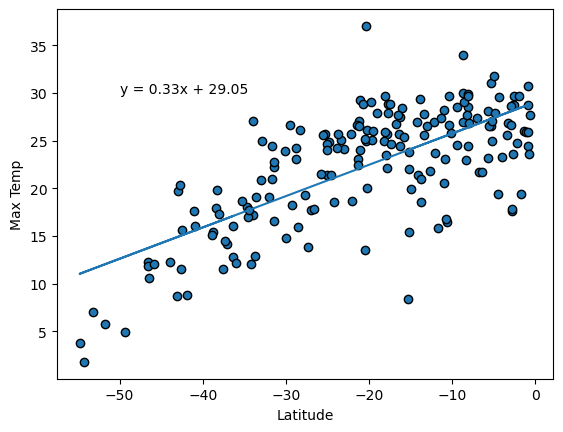

In [97]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o", edgecolors="black")
lin_r, lin_r_eq, r_value = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"], lin_r)
plt.annotate(lin_r_eq, (-50, 30))
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print("The R value is:", r_value[0])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The R value is: 0.25927234861957416


Text(0, 0.5, 'Humidity')

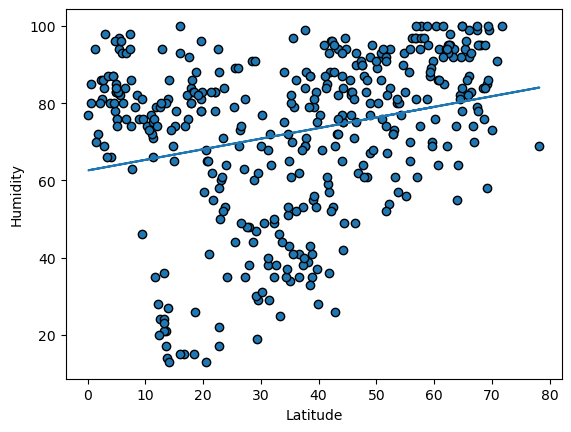

In [98]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o", edgecolors="black")
lin_r, lin_r_eq, r_value = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"], lin_r)
plt.annotate(lin_r_eq, (2, 0.5))
print("The R value is:", r_value[0])
plt.xlabel('Latitude')
plt.ylabel('Humidity')

The R value is: 0.14777698877199352


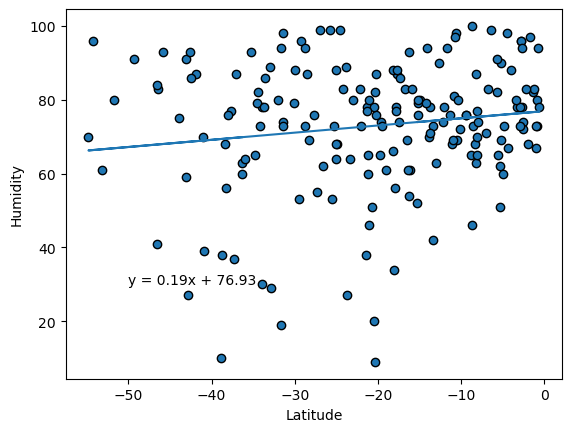

In [99]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o", edgecolors="black")
lin_r, lin_r_eq, r_value = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"], lin_r)
plt.annotate(lin_r_eq, (-50, 30))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print("The R value is:", r_value[0])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The R value is: 0.2898368383299583


Text(0, 0.5, 'Cloudiness')

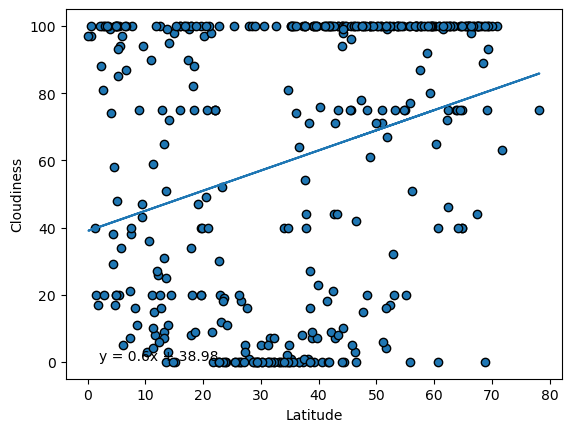

In [102]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o", edgecolors="black")
lin_r, lin_r_eq, r_value = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"], lin_r)
plt.annotate(lin_r_eq, (2, 0.5))
print("The R value is:", r_value[0])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

The R value is: 0.16674506917819665


Text(0, 0.5, 'Cloudiness')

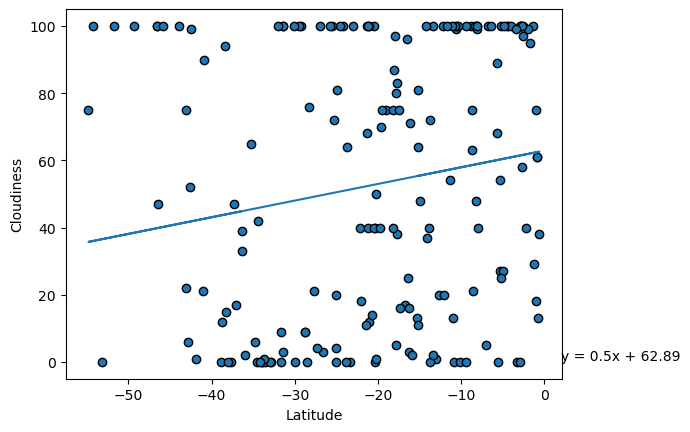

In [103]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o", edgecolors="black")
lin_r, lin_r_eq, r_value = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"], lin_r)
plt.annotate(lin_r_eq, (2, 0.5))
print("The R value is:", r_value[0])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The R value is: 0.285261886954672


Text(0, 0.5, 'Wind Speed')

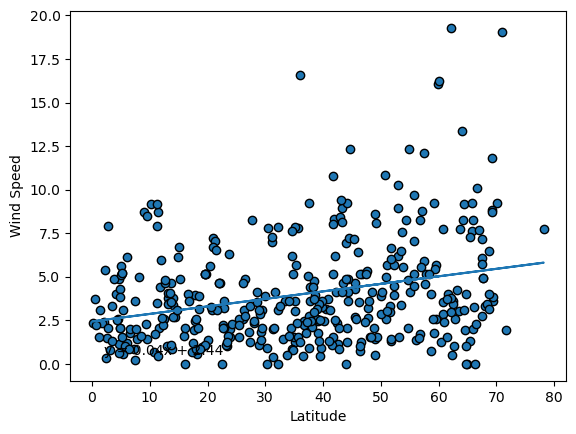

In [101]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o", edgecolors="black")
lin_r, lin_r_eq, r_value = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"], lin_r)
plt.annotate(lin_r_eq, (2, 0.5))
print("The R value is:", r_value[0])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

The R value is: -0.2927805338149239


Text(0, 0.5, 'Wind Speed')

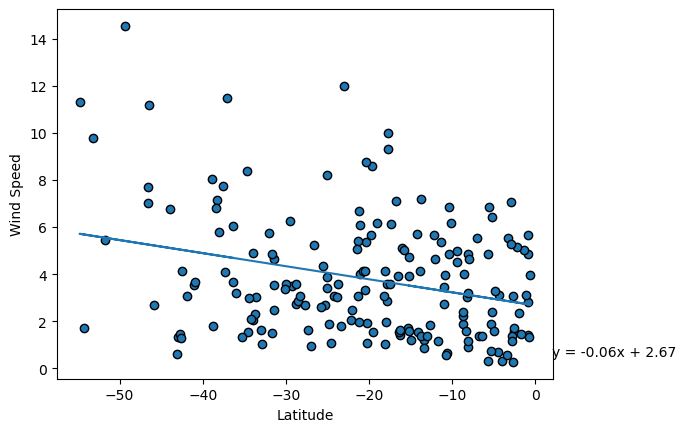

In [104]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o", edgecolors="black")
lin_r, lin_r_eq, r_value = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"], lin_r)
plt.annotate(lin_r_eq, (2, 0.5))
print("The R value is:", r_value[0])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE